In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import json
import os 
import re

In [2]:
from importlib import reload

In [3]:
from Scripts import EDA_functions as mt_eda
reload(mt_eda)

<module 'Scripts.EDA_functions' from '/home/owner/Documents/Github_projects/Tinder_analysis/Scripts/EDA_functions.py'>

In [4]:
data_path = "Data/data.json"

In [5]:
with open(data_path, "rb") as inp: 
    data = json.load(inp)

In [6]:
data.keys()

dict_keys(['Messages', 'Photos', 'Places', 'Purchases', 'Spotify', 'Usage', 'User'])

In [7]:
for k1 in data.keys():
    if type(data[k1]) == dict:
        print(k1 , " : ", data[k1].keys())

Places  :  dict_keys(['recentPlaces', 'blockedPlaces', 'analytics'])
Purchases  :  dict_keys(['subscription', 'consumable', 'boost_tracking', 'super_like_tracking'])
Spotify  :  dict_keys(['spotify_connected', 'spotify_theme_track'])
Usage  :  dict_keys(['app_opens', 'swipes_likes', 'swipes_passes', 'matches', 'messages_sent', 'messages_received'])
User  :  dict_keys(['active_time', 'age_filter_max', 'age_filter_min', 'bio', 'birth_date', 'connection_count', 'create_date', 'education', 'email', 'full_name', 'gender', 'gender_filter', 'interested_in', 'interests', 'ip_address', 'is_traveling', 'jobs', 'name', 'pos', 'schools', 'travel_location_info', 'travel_pos', 'phone_id', 'college'])


In [8]:
data["Usage"].keys()

dict_keys(['app_opens', 'swipes_likes', 'swipes_passes', 'matches', 'messages_sent', 'messages_received'])

In [9]:
for k in data["Usage"].keys(): 
    print(k, " : ", len(data["Usage"][k]))

app_opens  :  667
swipes_likes  :  667
swipes_passes  :  667
matches  :  667
messages_sent  :  667
messages_received  :  667


In [10]:
demo = pd.Series(data["Usage"]["app_opens"])

In [11]:
demo.head()

2014-11-22     3
2014-11-23     1
2014-11-24     1
2014-11-25     4
2014-11-26    19
dtype: int64

In [12]:
demo.index = pd.to_datetime(demo.index)

In [15]:
demo_str_list = pd.Series(demo.index).apply(mt_eda.flatten_date)

In [16]:
demo.index = demo_str_list

In [18]:
gb_dt = demo.groupby(demo.index)

In [34]:
funcs = {"Days Opened": len, "mean" : np.mean, "max":np.max, "std":np.std}
agg_series = {func_names:gb_dt.apply(func) for func_names, func in funcs.items()}
# total_app_opens = gb_dt.apply(f1)

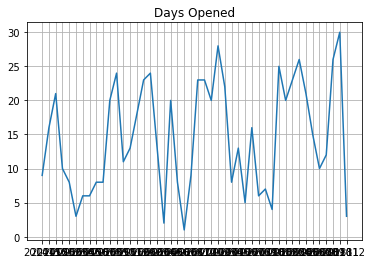

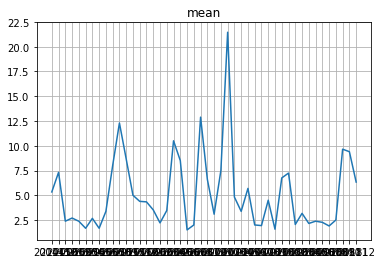

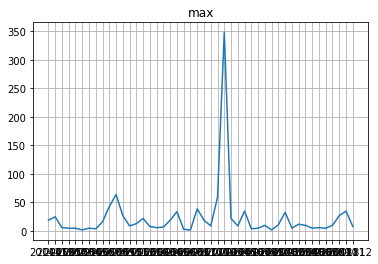

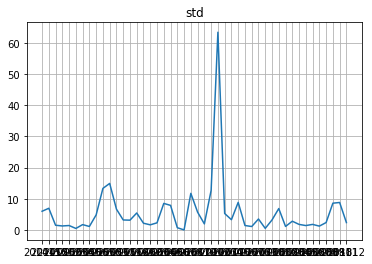

In [35]:
for name, series in agg_series.items():
    plt.plot(series)
    plt.title(name)
    plt.grid(True)
    plt.show()